# Classification ignition point 

This project is a classification problem

It is to determine whether a point has a probability to be an ignition point for wildfire. The ignition point is where the wildfire starts. To know the probability where a fire would start is central at Descartes because it will help us to better simulate wildfires.

Don't hesitate to contact us, if you have any doubts on what is asked or if you encounter errors while using the notebook.

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2

# Parameters

In [3]:
DATA_PATH = Path("data")
DATAFRAME_FOLDER_PATH = DATA_PATH / "classification_dataframe"

# Download data

In [4]:
dataframe_path = DATAFRAME_FOLDER_PATH / "dataset.csv"

In [5]:
df = pd.read_csv(dataframe_path, index_col=0)
df.head()

,Date,distance_fire_stations,distance_rivers,distance_roads,distance_powerlines,cropland,forest_deciduous_broad,forest_deciduous_needle,forest_evergreen_broad,forest_evergreen_needle,...,avg_wind_angle,avg_rel_hum,avg_soil,sum_prec,forest,vegetation_class,Year,max_max_temp,yearly_avg_temp,ignition
0,2015-11-19,13287.682266,7211.102551,1250.000000,30196.233209,0.0,0.0,0.0,1.000000,0.0,...,225.773605,56.837185,0.297854,0.360376,1.000000,forest,2015,62.552337,14.994683,1
1,2003-02-17,8721.381771,2358.495283,250.000000,13768.169813,0.0,0.0,0.0,0.416667,0.0,...,209.708847,61.120739,0.264534,0.020176,0.833333,forest,2003,60.787457,15.053698,1
2,2012-02-26,10796.411441,0.000000,2015.564437,6254.998002,0.0,0.0,0.0,0.666667,0.0,...,76.341278,63.017559,0.208871,0.025395,1.000000,forest,2012,63.420256,15.001883,1
3,2004-11-10,8253.787010,559.016994,0.000000,37350.535471,0.0,0.0,0.0,0.000000,0.0,...,68.557823,64.673866,0.156506,0.000000,0.000000,wetland,2004,60.394119,14.850611,1
4,2003-03-19,9905.806378,0.000000,1903.943276,6427.480066,0.0,0.0,0.0,0.750000,0.0,...,316.951508,56.103680,0.208831,0.119717,0.916667,forest,2003,69.570496,NaN,1


# Structure of the dataframe and Task


- Each row consists of an ignition or non-ignition point with the given features associated. The features were chosen as potentially influencing ignition.


- The last column named `ignition` says if the point was a real ignition point (meaning that it occurred historically), in that case the value is `1`. Otherwise, when the value is `0`, it means that it is a 'non-ignition point'.


- The columns `cropland` to `wetland` gives the ratio of each of the vegetation classes under which the ignition or non-ignition point lies. The sum of these ratios should be equal to 1. For more information refer to this website: https://lcviewer.vito.be/


- The temperatures should be in degrees celsius `(°C)`.


- The weather data come from different sources and they might have different units.

| Column name | Definition | Unit |
|--------|-----------|--------|
| `ignition`   | Target column| Boolean: {1,0} |
| `distance_{feature}` | Distance to nearest feature  |  Meters (m) |
| vegetation class: from `cropland` to `wetland`  |  Ratio of each of the vegetation classes  under which the ignition or non-ignition point lies    |  No unit (between 0 and 1)  |
| `aspect`  |  Orientation of the slope    |  Degrees (°)  |
| `elevation`  |  elevation value    |  Meters  |
| `slope`  |  Slope value    |  Degrees (°)  |
| `pop_dens`  |  Population density value    |  Persons per km2  |
| `max_temp`  |  Maximum temperature of the day    |  Degrees celsius (°C)  |
| `avg_temp`  |  Average temperature of the day   |  Degrees celsius (°C)  |
| `max_wind_vel`  |  Maximum wind velocity of the day    |  Meters per second (m/s)  |
| `avg_wind_angle`  |  Average angle of the vector wind over the day    |  Degrees (°)  |
| `avg_rel_hum`  |  Average relative humidity over the day    |  %  |
| `avg_soil`  |  Average soil moisture of the day    |  m3/m3  |
| `sum_prec`  |  Cumulative rainfall precipitation of the day    |  Millimeters (mm)  |
| `yearly_avg_temp`  |  Average temperature over the year    |  Degrees celsius (°C)  |
| `anom_{feature}`  |  Standardized anomaly of weather for the given day over the last 30 years. When the anomaly is positive, it means that the feature value is greater that the 30-year average    |  No unity |
| `forest`  |  Sum of all the columns where the names start with `forest`   |  No unit  |
| `vegetation_class`  |  Vegetation with the max occurrence in the vicinity of the ignition/non-ignition point    |  Without unit  |
| `Year`  |  Year of ignition    |  Without unit  |
| `max_max_temp`  |  Missing information    |  Missing information  |



# Task


🚨 **Your task is to design a classification algorithm to predict whether a point is an ignition point or not. The target column is `ignition`** 🚨

You can import any package you want.

---

I am using ydata-profiling in order to perform quick data visualization and gain some time here:

In [6]:
!pip install ydata-profiling ipywidgets


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [19]:
# Change `False` to `True` once the predictions are generated (or else, the plots will not show)
# ydata_profiling causes some plots not to show if the profile is generated before

if False:  # CHANGE HERE
    from ydata_profiling import ProfileReport

    profile = ProfileReport(df, minimal=True)
    display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

It seems like many features are very sparse (lots of 0s). We could discretize these features (0 vs non-0).  
Also, some features are heavily positively skewed, for which we could apply the log transform: `log(eps + x)`

`forest_deciduous_needle`, `forest_mixed`, `moss_lichen` values are always zero, so we might as well drop them (done in the model script).

---

Here, I am using the [`lazypredict`](https://github.com/shankarpandala/lazypredict) package to perform classification and efficiently benchmark several classifier models.
> _Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning._

The `seaborn` library will be used for the visualizations.  
The `scikit-learn` version is needed to avoid [this issue](https://github.com/shankarpandala/lazypredict/issues/441).

In [8]:
!pip install lazypredict seaborn 'scikit-learn<1.2'


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


I created the `classification` module, containing two scripts:
- `processing.py`, for the data processing and feature engineering
- `model.py`, to compute predictions and evaluate them on data

In [9]:
from classification.processing import DataProcessor
from classification.model import ModelPredictor

processor = DataProcessor()

X_train, X_test, y_train, y_test = processor.split_data(
    test_size=0.25,
    random_state=0,
    shuffle=True,
    stratify_flag=True,
)

predictor = ModelPredictor(random_state=0)

2024-02-07 16:37:45.517 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-07 16:37:45.519 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-07 16:37:45.519 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-07 16:37:45.520 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-07 16:37:46.036 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-02-07 16:37:46.155 
  command:

    streamlit run /Users/daniel.altunay/Library/Caches/pypoetry/virtualenvs/data-scientist-technical-test-VlMbHKGJ-py3.10/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-02-07 16:37:46.156 No runtime found, using MemoryCacheStorageManager
2024-02-07 16:37:46.226 No runtime found, using MemoryCacheStorageManager
2024-02-07

In [10]:
models, predictions = predictor.lazy_predict(X_train, X_test, y_train, y_test)

2024-02-07 16:37:46.294 No runtime found, using MemoryCacheStorageManager
 97%|█████████▋| 28/29 [00:26<00:00,  1.05it/s]

[LightGBM] [Info] Number of positive: 2490, number of negative: 14036
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6060
[LightGBM] [Info] Number of data points in the train set: 16526, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.150672 -> initscore=-1.729343
[LightGBM] [Info] Start training from score -1.729343


100%|██████████| 29/29 [00:27<00:00,  1.07it/s]


In [11]:
display(models)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.76,0.79,0.79,0.80,0.03
BernoulliNB,0.78,0.76,0.76,0.81,0.03
XGBClassifier,0.90,0.75,0.75,0.89,0.22
LGBMClassifier,0.89,0.75,0.75,0.89,0.51
RandomForestClassifier,0.90,0.72,0.72,0.89,2.46
DecisionTreeClassifier,0.85,0.72,0.72,0.85,0.33
BaggingClassifier,0.89,0.71,0.71,0.88,1.72
AdaBoostClassifier,0.88,0.71,0.71,0.87,1.56
LabelSpreading,0.84,0.70,0.70,0.84,5.75


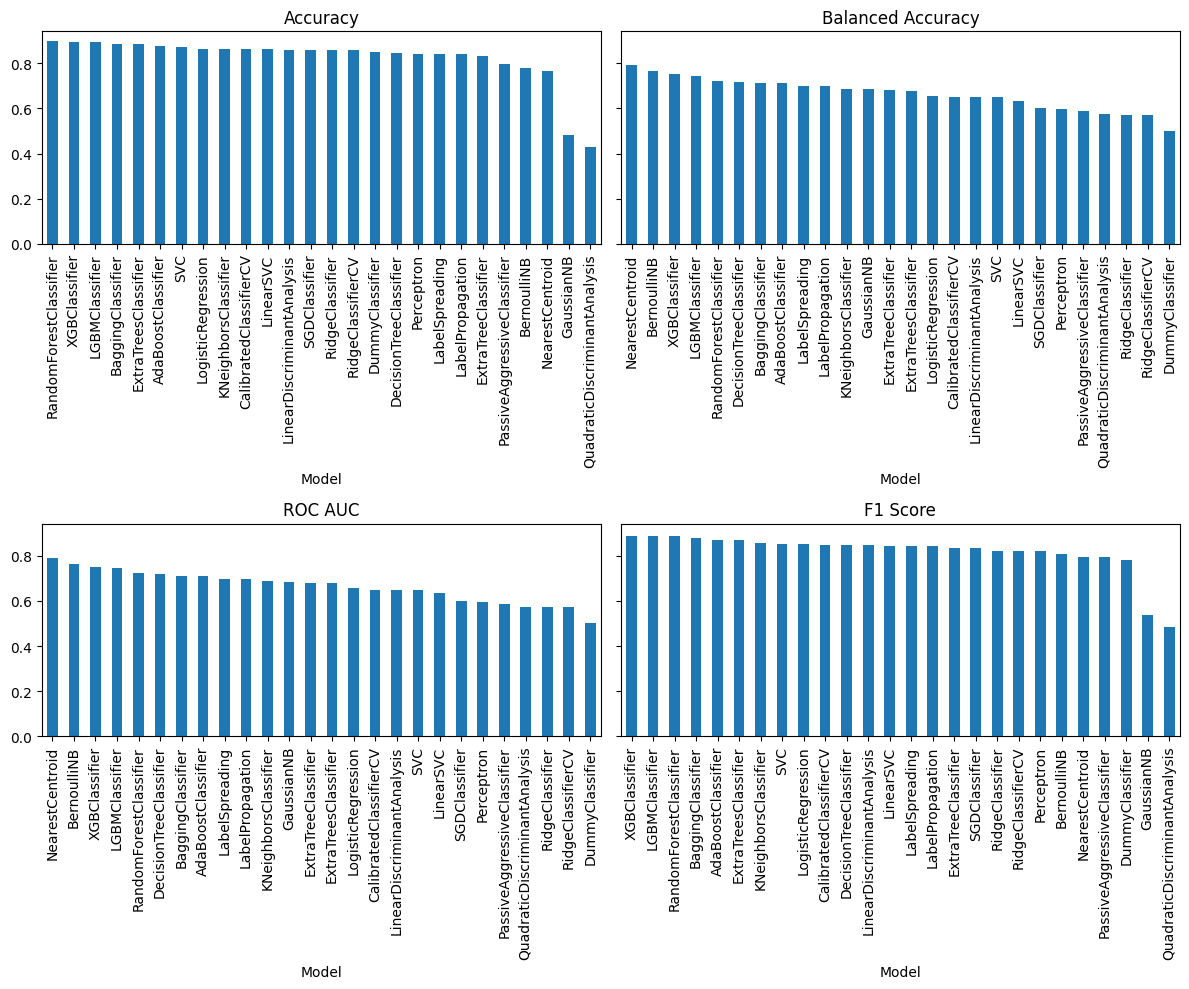

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

models["Accuracy"].sort_values(ascending=False).plot(
    kind="bar", ax=axs[0, 0], title="Accuracy"
)
models["Balanced Accuracy"].sort_values(ascending=False).plot(
    kind="bar", ax=axs[0, 1], title="Balanced Accuracy"
)
models["ROC AUC"].sort_values(ascending=False).plot(
    kind="bar", ax=axs[1, 0], title="ROC AUC"
)
models["F1 Score"].sort_values(ascending=False).plot(
    kind="bar", ax=axs[1, 1], title="F1 Score"
)

plt.tight_layout()
plt.show()

Let's focus on the XGBClassifier (gradient boosting) pipeline, as it seems to have good performance on all 4 metrics.

In [13]:
model_dict = predictor.provide_models(X_train, X_test, y_train, y_test)
selected_model = model_dict.get("XGBClassifier")

display(selected_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['distance_fire_stations', 'distance_rivers', 'distance_roads',
       'distance_powerlines', 'cropland', 'forest_deciduous_broad',
       'forest_evergreen_broad', 'forest_evergreen_needle', 'forest_unknown',
       'herbace...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [14]:
frame = predictor.get_classification_report(X_test, y_test, selected_model)
display(frame)

,0,1,accuracy,macro avg,weighted avg
precision,0.92,0.69,0.90,0.81,0.89
recall,0.96,0.55,0.90,0.75,0.90
f1-score,0.94,0.61,0.90,0.78,0.89
support,4679.00,830.00,0.90,5509.00,5509.00


It seems the model has good metrics overall but a somewhat low recall (0.57), which means it fails at properly assigning a positive label to 43% of the actual positive labels.  
Some ways to mitigate this would be:
- downsample the majority class
- upsample the minority class
- add class weights
- decrease the classification threshold (but it will decrease precision)

Let's perform some visualization:

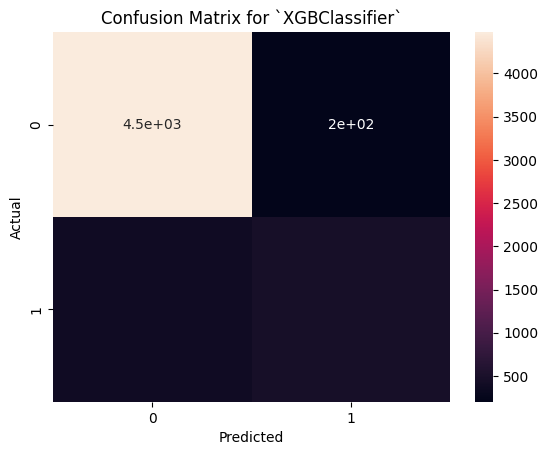

In [15]:
fig = predictor.get_confusion_matrix(X_test, y_test, selected_model)
plt.show()

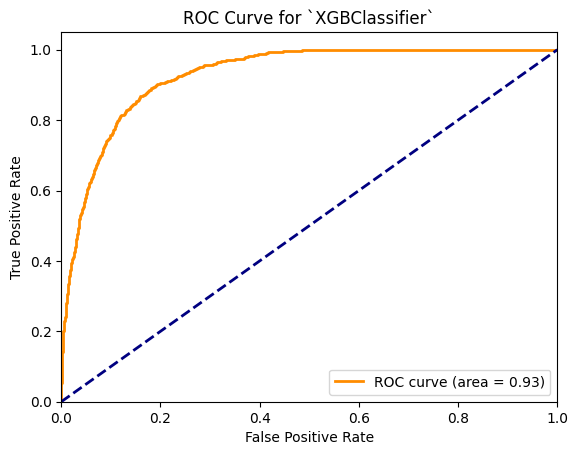

In [16]:
fig = predictor.get_roc_curve(X_test, y_test, selected_model)
plt.show()

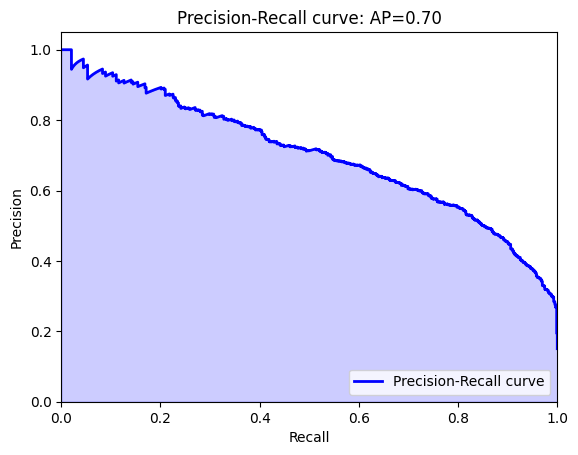

In [17]:
fig = predictor.get_precision_recall_curve(X_test, y_test, selected_model)
plt.show()

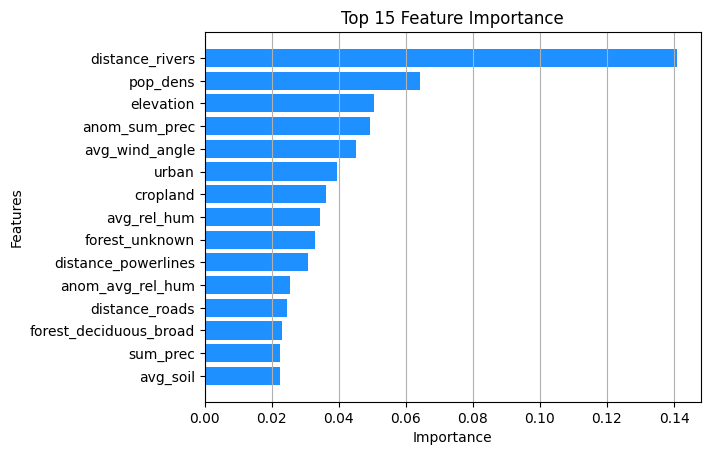

In [18]:
fig = predictor.get_feature_importance(
    selected_model, feature_names=X_test.columns, top_n=15
)
plt.show()

In the end, it appears the XGBClassifier performs pretty well on this task (_ROC AUC_: 0.92).
It is important to focus on _precision_ and _recall_ too, especially focusing on class 1 (**ignition**), since it is a binary classification problem.

- The precision is of 0.67, which means that out of all the positive (ignition) predictions made by the model, 67% of them were correct.  
Having a low precision means the customer might pay insurance for "nothing", as no ignition happened, so they lose money.

- The recall is of 0.53, which means that out of all the positive (ignition) real days, 53% of them were correctly classified as ignition by the model.  
Having a low recall means the customer might not pay insurance when they should have, so they lose money.

In order to find the sweet spot between precision and recall (as we can see on the precision-recall curve), we might need some more data about:
- how much money does the customer spend on insurance?
- how much money does the customer lose because of ignition days?

With this data, we could add some weights to classes or build a custom metric, which would more accurately represent the problem.

---

It is interesting to see that the most important feature for this model is the `distance_roads` feature.  
In order to have a better view of the feature importances and contributions, we could perform a SHAP analysis.

---

In order to improve performance, here are some possible next steps:
- Do some more feature engineering (maybe considering physics?)
- Perform some hyperparameter tuning using Optuna, Hyperopt
- Downsample the majority classe (currently representing 85% of the dataset)
- Upsample the minority class (although it rarely improves performance)
- Try other classification models (although Gradient Boosting is often the best)
- Do some dimensionality reduction (via feature selection or PCA, LDA, etc.)
- Handle outliers
- Use regularization techniques (L1, L2)
- Implement cross-validation for better evaluation
- etc.